In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('CQI_Drops_OVERSHOOTING.csv')

In [4]:
data.columns

Index(['eNodeB Name', 'Cell Name', 'LocalCell Id', 'E-UTRAN Average CQI',
       'MaxCounter_y', 'MinDistance_y', 'MaxDistance_y', 'Cell_Type_y',
       'DISTANCE_Threshold_y', 'AvgSiteToSiteDistance_y',
       'MaxOvershoot_Idicator_y', 'OvershootingOnDISTANCE_Threshold',
       'OvershootingOnMaxIdicator_y', 'ServiceDropRate'],
      dtype='object')

In [3]:
def indexs_over (Data):
    list1=[]
    for i in range(0,32757):
        if (Data.iloc[i]['MaxOvershoot_Idicator_y']>2 and Data.iloc[i]['E-UTRAN Average CQI']<7 and Data.iloc[i]['ServiceDropRate']>2):
            list1.append(i)
    return list1        


In [5]:
all=indexs_over(data)

In [11]:
df2=pd.DataFrame()
x1=[];y1=[];z1=[];cell=[]
for i in (all):
    cell.append(data.iloc[i]['Cell Name'])
    x1.append(data.iloc[i]['MaxOvershoot_Idicator_y'])
    y1.append(data.iloc[i]['E-UTRAN Average CQI'])
    z1.append(data.iloc[i]['ServiceDropRate'])
df2.insert(0, 'Cell Name', cell, True)    
df2.insert(1, 'MaxOvershoot_Idicator', x1, True)
df2.insert(2, 'ServiceDropRate', z1, True)
df2.insert(3, 'E-UTRAN Average CQI', y1, True)

In [12]:
df2.to_csv('lowCQI_HighDrop_OVERSHOOTING.csv', index=False, index_label=False)

In [5]:
def indexs_over2 (Data):
    list2=[]
    for i in range(0,32757):
        if (Data.iloc[i]['MaxOvershoot_Idicator_y']>2 and Data.iloc[i]['E-UTRAN Average CQI']<7 ):
            list2.append(i)
    return list2  

In [6]:
over_CQI=indexs_over2(data)

In [7]:
def indexs_over3 (Data):
    list3=[]
    for i in range(0,32757):
        if (Data.iloc[i]['MaxOvershoot_Idicator_y']>2  and Data.iloc[i]['ServiceDropRate']>2):
            list3.append(i)
    return list3

In [8]:
over_Drop=indexs_over3(data)

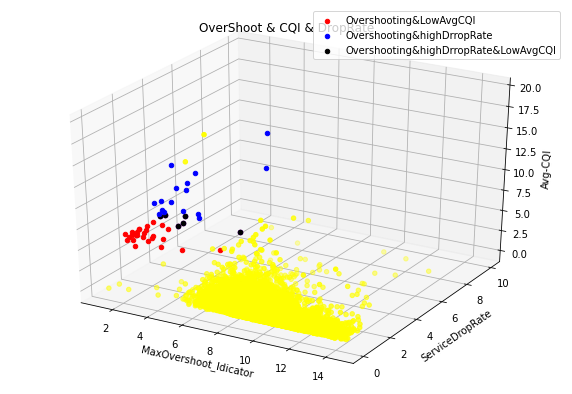

In [9]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
  
# Creating dataset
y = data.loc[:,'MaxOvershoot_Idicator_y']
x = data.loc[:,'E-UTRAN Average CQI']
z = data.loc[:,'ServiceDropRate']
ax.scatter3D(x, y, z, color = "yellow")
 
for j,i in enumerate(over_CQI):
    x = data.iloc[i]['MaxOvershoot_Idicator_y']
    z = data.iloc[i]['E-UTRAN Average CQI']
    y = data.iloc[i]['ServiceDropRate']
    if j==0:
        ax.scatter3D(x, y, z, color = "red",label='Overshooting&LowAvgCQI')
    else:
       ax.scatter3D(x, y, z, color = "red")   

for j,i in enumerate(over_Drop):
    x = data.iloc[i]['MaxOvershoot_Idicator_y']
    z = data.iloc[i]['E-UTRAN Average CQI']
    y = data.iloc[i]['ServiceDropRate']
    if j==0:
        ax.scatter3D(x, y, z, color = "blue",label='Overshooting&highDrropRate')
    else:
        ax.scatter3D(x, y, z, color = "blue")    

for j,i in enumerate(all):
    x = data.iloc[i]['MaxOvershoot_Idicator_y']
    z = data.iloc[i]['E-UTRAN Average CQI']
    y = data.iloc[i]['ServiceDropRate']
    if j==0:
        ax.scatter3D(x, y, z, color = "black",label='Overshooting&highDrropRate&LowAvgCQI')
    else:
         ax.scatter3D(x, y, z, color = "black")   


# Creating plot
plt.title("OverShoot & CQI & DropRate")
ax.set_xlabel('MaxOvershoot_Idicator')
ax.set_zlabel('Avg-CQI')
ax.set_ylabel('ServiceDropRate')
plt.legend()
# show plot
plt.show()